# Computer Vision Assignment 3 
#### Submitted By :  
## Mina Wagdi Fikri 
## ID : 14p8053

# Question 1

In [1]:
import numpy as np
from skimage import data , io , filters #Data for images , io for imshow , filters for prewitt
%matplotlib inline
import math

In [2]:
def DilOrErr(img, structElementSize, op):
    R = img.shape[0]
    C = img.shape[1]
    count = 0 
    print("image shape is :",R,"x",C)
    #the output img is the same size as the input image
    newImg = np.zeros((R,C,3),dtype=img.dtype)
    #if structuring element is 3x3 then begin to loop from the index 1,1 in the original image
    PixelsNumBeforeCenter = int(np.floor((structElementSize/2)))
    print("PixelsNumBeforeCenter is : ",PixelsNumBeforeCenter)
    for i in range(PixelsNumBeforeCenter,R-PixelsNumBeforeCenter):
        for j in range(PixelsNumBeforeCenter,C-PixelsNumBeforeCenter):
            windowR = img[i-PixelsNumBeforeCenter:i+PixelsNumBeforeCenter+1, j-PixelsNumBeforeCenter:j+PixelsNumBeforeCenter+1,0]
            windowG = img[i-PixelsNumBeforeCenter:i+PixelsNumBeforeCenter+1, j-PixelsNumBeforeCenter:j+PixelsNumBeforeCenter+1,1]
            windowB = img[i-PixelsNumBeforeCenter:i+PixelsNumBeforeCenter+1, j-PixelsNumBeforeCenter:j+PixelsNumBeforeCenter+1,2]
            #print("windowR is ",windowG)            
            #print("windowR is ",windowB)
            #count+=1
            #print("Count is ",count)
            if op=="Dil":
                #print("max is ",windowR.max())
                newImg[i][j][0]=np.amax(windowR)
                newImg[i][j][1]=np.amax(windowG)
                newImg[i][j][2]=np.amax(windowB)
            else: 
                #print("min is ",windowR.min())
                newImg[i][j][0]=np.amin(windowR)
                newImg[i][j][1]=np.amin(windowG)
                newImg[i][j][2]=np.amin(windowB)
            
    return newImg

In [3]:
def opening(img,structElementSize):
    newImg=DilOrErr(img,structElementSize,"Err")
    newImg=DilOrErr(newImg,structElementSize,"Dil")
    return newImg

In [4]:
def closing(img,structElementSize):
    newImg=DilOrErr(img,structElementSize,"Dil")
    newImg=DilOrErr(newImg,structElementSize,"Err")
    return newImg

In [5]:
def incContrast(img,structSize,a,b):
    img = img.astype(np.int32)
    OpenedImg = opening(img,structSize)
    ClosedImg = closing(img,structSize)
    
    OpenedImg = OpenedImg.astype(np.int32)
    ClosedImg = ClosedImg.astype(np.int32)
    newImg = np.clip((img+(a*(img-OpenedImg))-(b*(ClosedImg-img))),0,255)
    return newImg.astype(np.uint8)

In [6]:
img = io.imread('Mars.jpg')
img.shape

(253, 884, 3)

# The Original Image

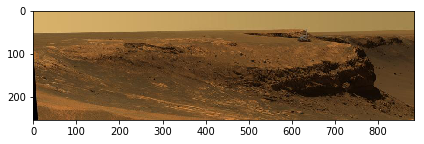

In [7]:
io.imshow(img)

# Structuring Element Size = 3 , a = 1 , b = 1 

image shape is : 253 x 884
PixelsNumBeforeCenter is :  1
image shape is : 253 x 884
PixelsNumBeforeCenter is :  1
image shape is : 253 x 884
PixelsNumBeforeCenter is :  1
image shape is : 253 x 884
PixelsNumBeforeCenter is :  1


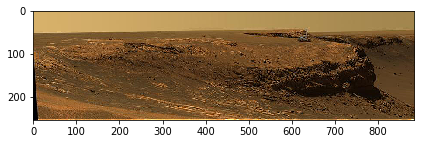

In [8]:
io.imshow(incContrast(img,3,1,1))
io.show()

# Structuring Element Size = 9 , a = 1 , b = 1 

image shape is : 253 x 884
PixelsNumBeforeCenter is :  4
image shape is : 253 x 884
PixelsNumBeforeCenter is :  4
image shape is : 253 x 884
PixelsNumBeforeCenter is :  4
image shape is : 253 x 884
PixelsNumBeforeCenter is :  4


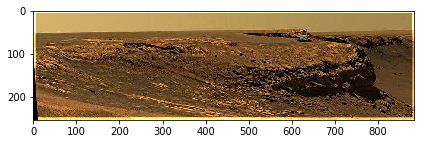

In [9]:
io.imshow(incContrast(img,9,1,1))
io.show()

# Structuring Element Size = 3 , a = 5 , b = 1

image shape is : 253 x 884
PixelsNumBeforeCenter is :  1
image shape is : 253 x 884
PixelsNumBeforeCenter is :  1
image shape is : 253 x 884
PixelsNumBeforeCenter is :  1
image shape is : 253 x 884
PixelsNumBeforeCenter is :  1


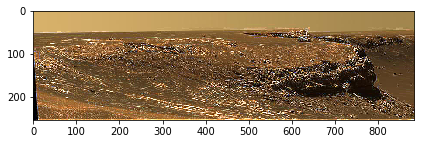

In [10]:
io.imshow(incContrast(img,3,5,1))
io.show()

# Structuring Element Size = 3 , a = 1 , b = 5

image shape is : 253 x 884
PixelsNumBeforeCenter is :  1
image shape is : 253 x 884
PixelsNumBeforeCenter is :  1
image shape is : 253 x 884
PixelsNumBeforeCenter is :  1
image shape is : 253 x 884
PixelsNumBeforeCenter is :  1


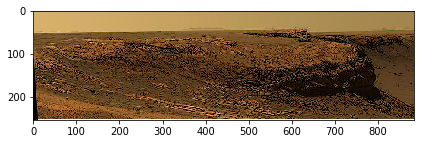

In [11]:
io.imshow(incContrast(img,3,1,5))
io.show()

# Explain how the equation given above increases the contrast of images

### The equation calculates the difference between the image and its ### opening(Opening increases the values of the pixels) then subtract
### the difference between the image and its closing (which decreases the values of the pixels and makes it darker )
### So this subtraction results in a positive solution which increases the contrast of images.

# Comment on the effect of increase the structuring element size on the output image : 
### It increases the contrast of the image and makes it look more sharp

# Increasing a : Increases white points 
# Increasing b : Increases dark points

# Suggest an expression that could decrease the contrast using morphological
# operators : 
### Same equation but opposite signs of "a" and "b"

# Question 2

In [12]:
import numpy as np
import skimage
from skimage import io, data, color

In [13]:
def calcSumOfSquaredErrors(LeftWindow,RightWindow):
    s = np.sum((LeftWindow-RightWindow)**2)
    #for i in range(0,LeftWindow.shape[0]):
     #   for j in range(0,LeftWindow.shape[1]):
            #sum += (LeftWindow[i][j]-RightWindow[i][j])**2
      #      sum = np.sum((LeftWindow-RightWindow)**2)
    return s

In [14]:
def calcSumOfSquaredErrors(LeftWindow,RightWindow):
    s = np.sum((LeftWindow-RightWindow)**2)
    #for i in range(0,LeftWindow.shape[0]):
     #   for j in range(0,LeftWindow.shape[1]):
            #sum += (LeftWindow[i][j]-RightWindow[i][j])**2
      #      sum = np.sum((LeftWindow-RightWindow)**2)
    return s

In [15]:
from scipy.ndimage.filters import median_filter
def applyMedianFilter(img):
    return median_filter(img,9)

In [23]:
def depthMap(LeftImg,RightImg,WindowSize):
    R = LeftImg.shape[0]
    C = LeftImg.shape[1]
    PixelsNumBeforeCenter = int(np.floor((WindowSize/2)))
    newImg = np.zeros((R,C),dtype='float64') 
    for i in range(PixelsNumBeforeCenter,R-PixelsNumBeforeCenter):
        for j in range(PixelsNumBeforeCenter,C-PixelsNumBeforeCenter):
            # Form a window of size s x s around the pixel (i, j) of the left image
            LeftWindow = LeftImg[i-PixelsNumBeforeCenter:i+PixelsNumBeforeCenter+1, j-PixelsNumBeforeCenter:j+PixelsNumBeforeCenter+1].astype('float64')
            #Compare this window with all possible windows of the same size in the right image on the same row i
            min= 99999
            r = 0 
            for m in range(j+1,C-PixelsNumBeforeCenter):
                RightWindow = RightImg[i-PixelsNumBeforeCenter:i+PixelsNumBeforeCenter+1, m-PixelsNumBeforeCenter:m+PixelsNumBeforeCenter+1].astype('float64')
                S=calcSumOfSquaredErrors(LeftWindow,RightWindow)
                if S<min:
                    min=S
                    r=m
            newImg[i][j]=1-(1/(r-j))
    return newImg

In [17]:
img1 = io.imread('Image1.png').astype('float64')
img2 = io.imread('Image2.png').astype('float64')

# Window Size = 3x3

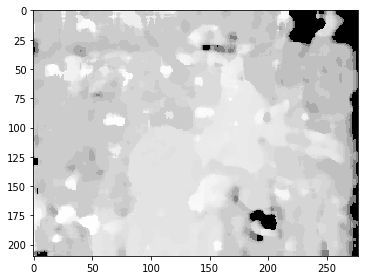

In [18]:
DepthImg = depthMap(img1, img2, 3)
DepthImg = applyMedianFilter(DepthImg)
io.imshow(DepthImg)
io.show()

# Window Size = 7x7 

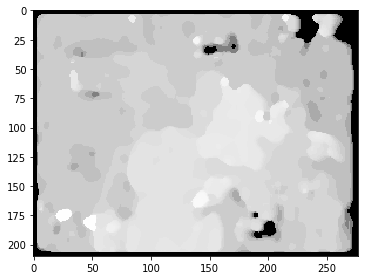

In [24]:
DepthImg = depthMap(img1,img2,7)
DepthImg = applyMedianFilter(DepthImg)
io.imshow(DepthImg)
io.show()